# Analisis Naive Bayes

### Import Modul

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Import Data

In [2]:
d_cardio = pd.read_excel('cardio_train.xlsx')

print (d_cardio.shape)

(70000, 13)


In [3]:
d_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Mempersiapkan Data Train

In [4]:
d_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


 ### Atribut "id", dihapus

In [5]:
d_cardio.drop(['id'], axis = 1, inplace = True)
d_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Merubah data negatif menjadi positif

In [6]:
d_cardio=abs(d_cardio)

In [7]:
d_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
Y = d_cardio.cardio
X = d_cardio
X.drop(['cardio'],axis = 1, inplace = True)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=143)

In [21]:
model1 = GaussianNB()
model1.fit(X_train, Y_train)

model2 = MultinomialNB()
model2.fit(X_train, Y_train)

model3 = BernoulliNB()
model3.fit(X_train, Y_train)

model4 = ComplementNB()
model4.fit(X_train, Y_train)

model5 = CategoricalNB()
model5.fit(X_train, Y_train)

CategoricalNB()

In [22]:
y_pred1 = model1.predict(X_test)
acc1 = accuracy_score(y_pred1,Y_test)

y_pred2 = model2.predict(X_test)
acc2 = accuracy_score(y_pred2,Y_test)

y_pred3 = model3.predict(X_test)
acc3 = accuracy_score(y_pred3,Y_test)

y_pred4 = model4.predict(X_test)
acc4 = accuracy_score(y_pred4,Y_test)

y_pred5 = model5.predict(X_test)
acc5 = accuracy_score(y_pred5,Y_test)

Text(0.5, 1.0, 'Grafik Akurasi Model')

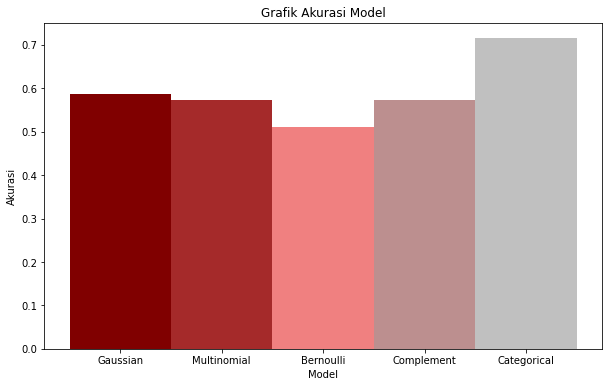

In [42]:
x=[1,2,3,4,5]
y=[acc1,acc2,acc3,acc4,acc5]
plt.figure(figsize=(10,6))
tick_label = ['Gaussian','Multinomial','Bernoulli','Complement','Categorical']
plt.bar(x,y,tick_label=tick_label, width =1,color = ['maroon','brown','lightcoral','rosybrown','silver'])

plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi Model')

In [29]:
print('Model Gaussian Naive Bayes     : ' , acc1)
print('Model Multinomial Naive Bayes  : ' , acc2)
print('Model Bernoulli Naive Bayes    : ' , acc3)
print('Model Complement Naive Bayes   : ' , acc4)
print('Model Categorical Naive Bayes  : ' , acc5)
print('Dengan data test size =0.15')

Model Gaussian Naive Bayes     :  0.5875238095238096
Model Multinomial Naive Bayes  :  0.5732380952380952
Model Bernoulli Naive Bayes    :  0.5115238095238095
Model Complement Naive Bayes   :  0.5731428571428572
Model Categorical Naive Bayes  :  0.7154285714285714
Dengan data test size =0.15


In [30]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.3, random_state=143)

In [31]:
y_pred13 = model1.predict(X_test2)
acc13 = accuracy_score(y_pred13,Y_test2)

y_pred23 = model2.predict(X_test2)
acc23 = accuracy_score(y_pred23,Y_test2)

y_pred33 = model3.predict(X_test2)
acc33 = accuracy_score(y_pred33,Y_test2)

y_pred43 = model4.predict(X_test2)
acc43 = accuracy_score(y_pred43,Y_test2)

y_pred53 = model5.predict(X_test2)
acc53 = accuracy_score(y_pred53,Y_test2)

Text(0.5, 1.0, 'Grafik Akurasi Model')

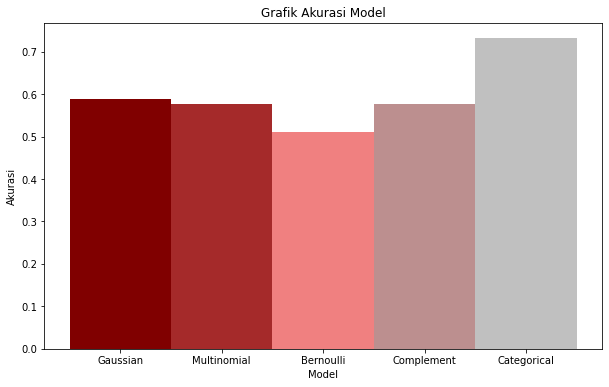

In [43]:
x=[1,2,3,4,5]
y=[acc13,acc23,acc33,acc43,acc53]
plt.figure(figsize=(10,6))
tick_label = ['Gaussian','Multinomial','Bernoulli','Complement','Categorical']
plt.bar(x,y,tick_label=tick_label, width =1, color = ['maroon','brown','lightcoral','rosybrown','silver'])

plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Grafik Akurasi Model')

In [33]:
print('Model Gaussian Naive Bayes     : ' , acc13)
print('Model Multinomial Naive Bayes  : ' , acc23)
print('Model Bernoulli Naive Bayes    : ' , acc33)
print('Model Complement Naive Bayes   : ' , acc43)
print('Model Categorical Naive Bayes  : ' , acc53)
print('Dengan test size = 0.3')

Model Gaussian Naive Bayes     :  0.5895714285714285
Model Multinomial Naive Bayes  :  0.5766666666666667
Model Bernoulli Naive Bayes    :  0.5119047619047619
Model Complement Naive Bayes   :  0.5766190476190476
Model Categorical Naive Bayes  :  0.7318095238095238
Dengan test size = 0.3


### Rata-rata akurasi model

In [37]:
import statistics
data1 = [acc1,acc13]
d1 = statistics.mean(data1)
data2 = [acc2,acc23]
d2 = statistics.mean(data2)
data3 = [acc3,acc33]
d3 = statistics.mean(data3)
data4 = [acc4,acc43]
d4 = statistics.mean(data4)
data5 = [acc5,acc53]
d5 = statistics.mean(data5)

In [38]:
print(d1)
print(d2)
print(d3)
print(d4)
print(d5)

0.5885476190476191
0.5749523809523809
0.5117142857142857
0.5748809523809524
0.7236190476190476


Text(0.5, 1.0, 'Grafik Rata-Rata Akurasi Model')

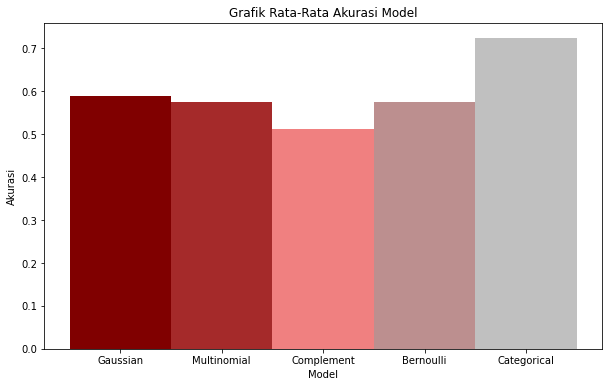

In [41]:
x=[1,2,3,4,5]
y=[d1,d2,d3,d4,d5]
plt.figure(figsize=(10,6))
tick_label = ['Gaussian','Multinomial','Complement','Bernoulli','Categorical']
plt.bar(x,y,tick_label=tick_label, width =1, color = ['maroon','brown','lightcoral','rosybrown','silver'])

plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Grafik Rata-Rata Akurasi Model')

### Terimakasih